In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Data Preparation

In [78]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [79]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [80]:
print(df.isna().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [81]:
print(df.duplicated().sum())

0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [83]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [84]:
# Konversi ke numerik
df['BP'] = df['BP'].replace({'HIGH':3,'LOW':1,'NORMAL':2})
df['Cholesterol'] = df['Cholesterol'].replace({'HIGH':2,'NORMAL':1})
df['Drug'] = df['Drug'].replace({'drugA':1,'drugB':2,'drugC':3,'DrugY':4,'drugX':5})
df.head()

C:\Users\mwahy\AppData\Local\Temp\ipykernel_21888\4024892567.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BP'] = df['BP'].replace({'HIGH':3,'LOW':1,'NORMAL':2})
C:\Users\mwahy\AppData\Local\Temp\ipykernel_21888\4024892567.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cholesterol'] = df['Cholesterol'].replace({'HIGH':2,'NORMAL':1})
C:\Users\mwahy\AppData\Local\Temp\ipykernel_21888\4024892567.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain t

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,3,2,25.355,4
1,47,M,1,2,13.093,3
2,47,M,1,2,10.114,3
3,28,F,2,2,7.798,5
4,61,F,1,2,18.043,4


Exploratoty Data Analysis

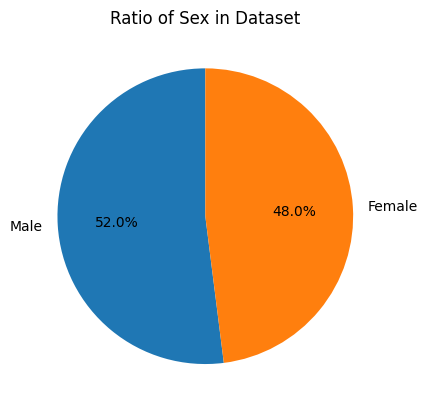

In [85]:

sex = df['Sex'].value_counts()
label = ['Male','Female']

plt.pie(sex, labels=label, autopct='%1.1f%%', startangle=90,)
plt.title('Ratio of Sex in Dataset')
plt.show()

C:\Users\mwahy\AppData\Local\Temp\ipykernel_21888\2850901148.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Sex'], palette='pastel')
C:\Users\mwahy\AppData\Local\Temp\ipykernel_21888\2850901148.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'F':1,'M':2})


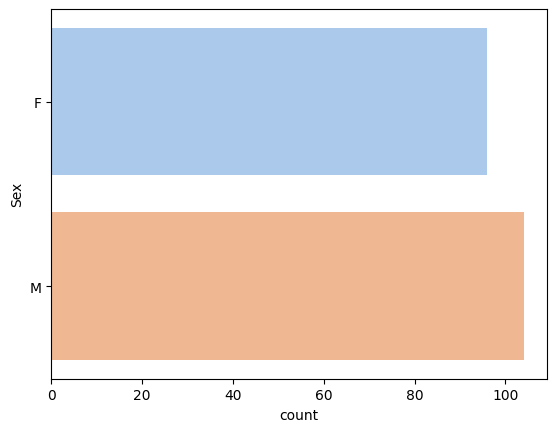

In [86]:
sns.countplot(df['Sex'], palette='pastel')
df['Sex'] = df['Sex'].replace({'F':1,'M':2})

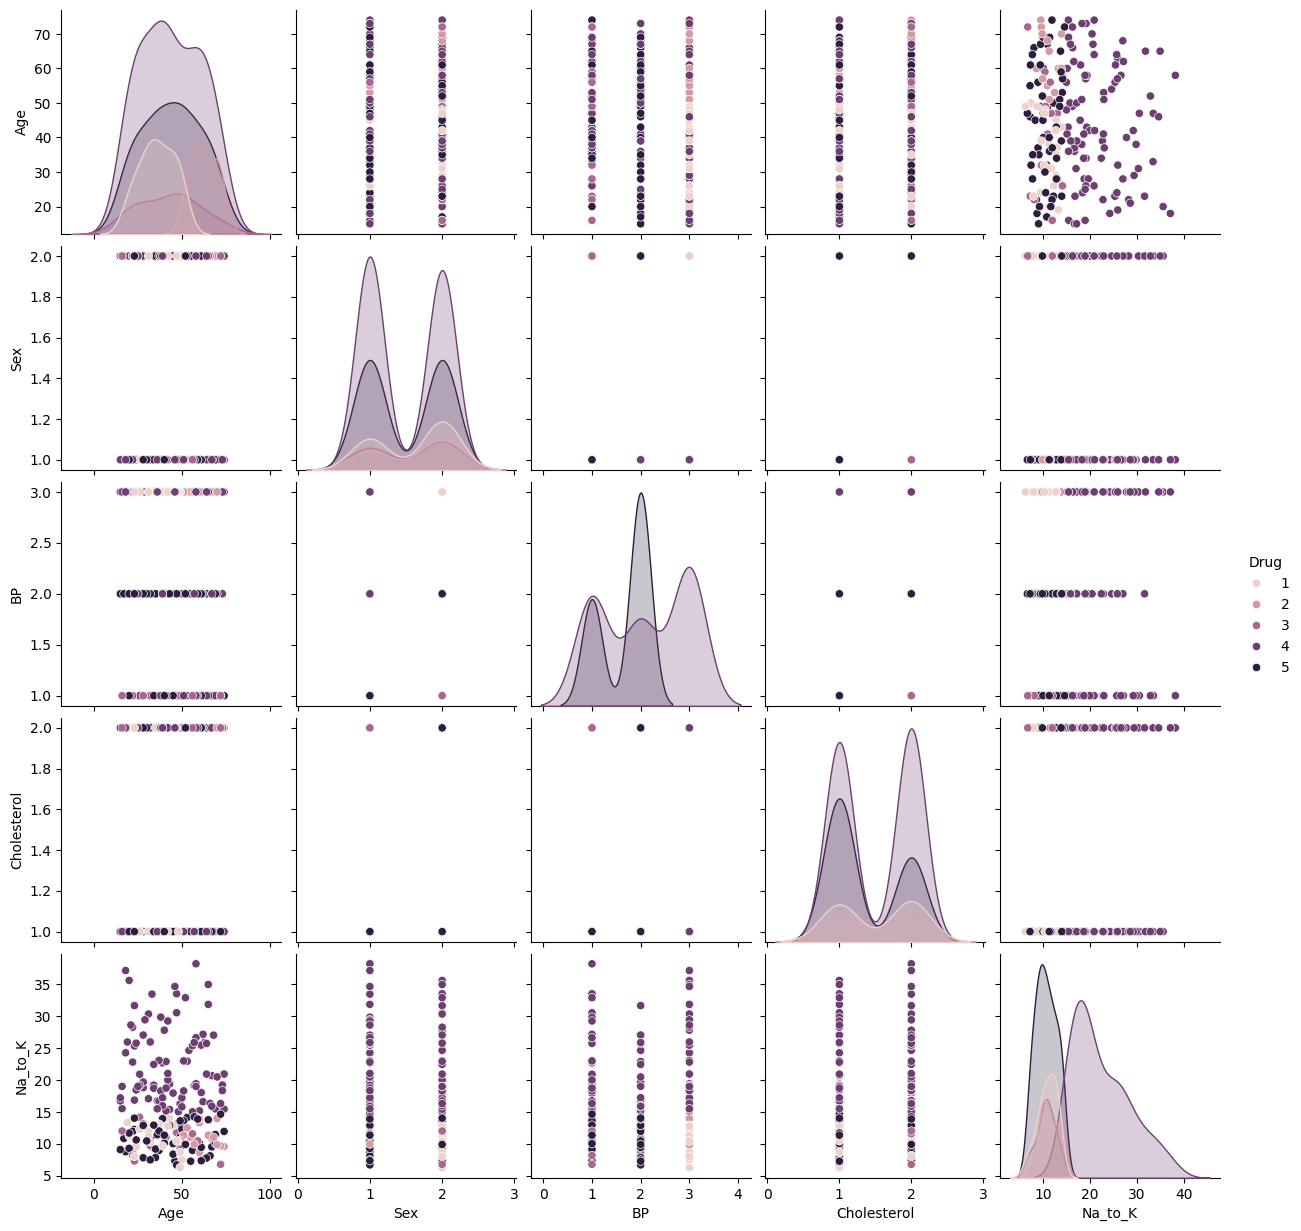

In [87]:
sns.pairplot(df, hue='Drug')

<Axes: >

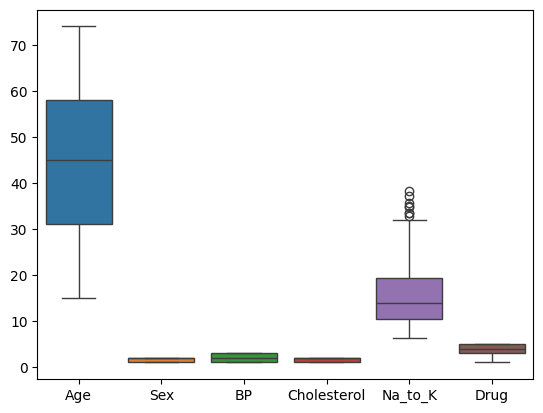

In [88]:
sns.boxplot(df)

<Axes: >

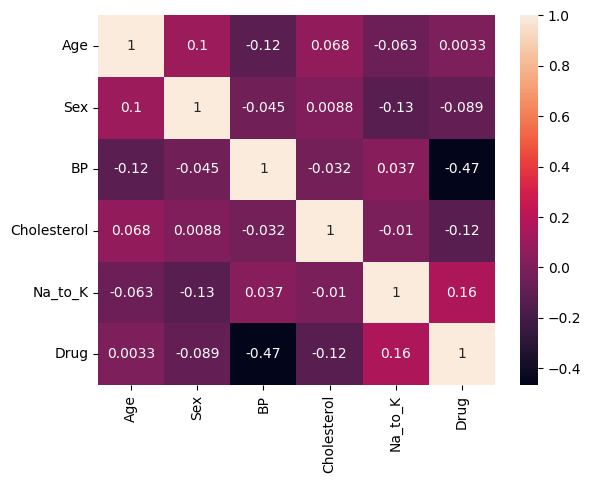

In [89]:
korelasi = df.corr()
sns.heatmap(korelasi, annot=True)

In [90]:
df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,1.520000,2.065000,1.515000,16.084485,3.685000
std,16.544315,0.500854,0.839224,0.501029,7.223956,1.270372
min,15.000000,1.000000,1.000000,1.000000,6.269000,1.000000
25%,31.000000,1.000000,1.000000,1.000000,10.445500,3.000000
50%,45.000000,2.000000,2.000000,2.000000,13.936500,4.000000
75%,58.000000,2.000000,3.000000,2.000000,19.380000,5.000000
max,74.000000,2.000000,3.000000,2.000000,38.247000,5.000000


Klasifikasi dengan algoritma K-Nearest Neighbor (KNN)

In [91]:
# Normalisasi data
label = df['Drug']
df = df.drop('Drug', axis=1)

mean = df.mean()
std = df.std()
df_normalized = (df - mean) / std
df = pd.concat([df_normalized,label], axis=1)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,-1.288358,-1.038228,1.114125,0.968008,1.283302,4
1,0.162291,0.958364,-1.269030,0.968008,-0.414106,3
2,0.162291,0.958364,-1.269030,0.968008,-0.826484,3
3,-0.986139,-1.038228,-0.077453,0.968008,-1.147084,5
4,1.008504,-1.038228,-1.269030,0.968008,0.271114,4


In [92]:
# Data Training
df_train = df[['BP','Na_to_K','Cholesterol','Drug']]
train_label = df_train['Drug'].values
df_train = df_train.drop('Drug', axis=1)


In [93]:
# Function menghitung euclidean distance 3 dimensi
def euclidean(p1,p2):
    return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 + (p1[2]-p2[2])**2)

In [94]:
# Function voting label tetangga terdekat
def voting(data):
    frekuensi = np.bincount(data)
    label_terpilih = np.argmax(frekuensi)
    return label_terpilih

In [95]:
def knn(df_train,train_label,df_test,k):
    prediksi_kelas = 0

    for _,point in df_test.iterrows():
        jarak = []

        for i in range(len(df_train)):
            distance = euclidean(df_train.iloc[i,:].values,point.values)
            jarak.append(distance)

        index_terdekat = np.argsort(jarak)[:k]
        class_terdekat = train_label[index_terdekat]

        class_terpilih = voting(class_terdekat)
        prediksi_kelas = class_terpilih

    return prediksi_kelas

In [96]:
# Data input yang akan di klasifikasikan

input_data = {'Age':[],'Sex':[],'BP':[],'Cholesterol':[],'Na_to_K':[]}
hasil_prediksi = 0

def submit():
    # -> Menyimpan data Input

    input_data['Age'].append(Input_Age.get()) # Menyimpan input Umur
    # Menyimpan input Jenis Kelamin
    Sex = Input_Sex.get()
    if Sex == 'M':
      input_data['Sex'].append(2)
    elif Sex == 'F':
      input_data['Sex'].append(1)  
    input_data['BP'].append(Input_BP.get()) # Menyimpan input Tekanan darah
    input_data['Cholesterol'].append(Input_Cholesterol.get()) # Menyimpan input Kolesterol
    input_data['Na_to_K'].append(Input_Na_to_K.get()) # Menyimpan input Na_to_K

    # Menjadi dataframe
    input_df = pd.DataFrame(input_data)
    input_df = input_df.astype(int)
    input_df.info()
    
    # Normalisasi Data
    input_df = (input_df - mean)/std
    
    # Memilih fitur
    df_test = input_df[['BP','Na_to_K','Cholesterol']]

    # -> Klasifikasi
    k=2
    hasil_prediksi = knn(df_train,train_label,df_test,k)
    print(hasil_prediksi)
    


In [97]:
# GUI
from tkinter import *

# -> Setting window
window = Tk() # inisialisasi window
window.config(background="#344E5C") # Konfigurasi warna background
window.geometry("420x500") # Ukuran window
window.title('Drug Clasification with KNN') # Judul dari window


# -> Membuat Label/Teks judul
main_label = Label(window,
                   text='Drug Clasification', # Teks
                   font=('Arial',24,'bold'), # Mengatur Font, Ukuran dan style
                   bg='#344E5C', # Warna background dari teks
                   fg='#A5C4D4') #  Warna teks
main_label.pack() # Menampilkan main_label pada window


# -> Membuat Input

label_Age = Label(window, text="Masukan umur:",bg="#344E5C",fg='White') # Teks perintah untuk mengisikan Umur
label_Age.config(pady=10)
label_Age.pack()
Input_Age = Entry(window) # Input Teks untuk Umur
Input_Age.pack()


label_Sex = Label(window, text="Masukan jenis kelamin (M/F):",bg="#344E5C",fg='White') # Teks perintah untuk mengisikan Jenis Kelamin
label_Sex.config(pady=10)
label_Sex.pack()
Input_Sex = Entry(window) # Input Teks untuk Jenis Kelamin
Input_Sex.pack()


label_BP = Label(window, text="Masukan tekanan darah:",bg="#344E5C",fg='White') # Teks perintah untuk mengisikan Tekanan Darah
label_BP.config(pady=10)
label_BP.pack()
Input_BP = Entry(window) # Input Teks untuk Tekannan Darah
Input_BP.pack()


label_Cholesterol = Label(window, text="Masukan kolesterol:",bg="#344E5C",fg='White') # Teks perintah untuk mengisikan Kolesterol
label_Cholesterol.config(pady=10)
label_Cholesterol.pack()
Input_Cholesterol = Entry(window) # Input Teks untuk Kolesterol
Input_Cholesterol.pack()


label_Na_to_K = Label(window, text="Masukan nilai Na_to_K:",bg="#344E5C",fg='White') # Teks perintah untuk mengisikan Na_to_K
label_Na_to_K.config(pady=10)
label_Na_to_K.pack()
Input_Na_to_K = Entry(window) # Input Teks untuk Na_to_K
Input_Na_to_K.pack()



# -> Membuat Button
button = Button(window,
                text='Enter', # Teks di button
                command=submit) # 
button.config(bg='#7195A9',fg='white',)
button.pack(pady=20)

# Menampilkan hasil prediksi
label_hasil = Label(window, text=f'Jenis Obat yang diperlukan adalah jenis: {hasil_prediksi}',pady=10)
label_hasil.pack()
window.mainloop() # Menampilkan window di komputer secara terus menerus 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          1 non-null      int32
 1   Sex          1 non-null      int32
 2   BP           1 non-null      int32
 3   Cholesterol  1 non-null      int32
 4   Na_to_K      1 non-null      int32
dtypes: int32(5)
memory usage: 148.0 bytes
4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          2 non-null      int32
 1   Sex          2 non-null      int32
 2   BP           2 non-null      int32
 3   Cholesterol  2 non-null      int32
 4   Na_to_K      2 non-null      int32
dtypes: int32(5)
memory usage: 168.0 bytes
4
